This notebook uses the functions `sourmashconsumr::from_taxonomy_annotate_to_multi_strains()` to detect whether there are multiple strains present in the CAMI low synthetic metageome. CAMI low has 40 source genomes, 22 distinct species and 18 strains. The table below summarizes the strain content.

| Species                         | Total source strains | Real strains | Evolved strains |
| ------------------------------- | -------------------- | ------------ | --------------- |
| Anaeroplasma bactoclasticum     | 4                    | 1            | 3               |
| Hydrotalea sandarakina          | 6                    | 1            | 5               |
| Paracoccus denitrificans        | 3                    | 3            | 0               | 
| unidentified Bacillales species | 5                    | 1            | 4               |

In [1]:
#remotes::install_github("Arcadia-Science/sourmashconsumr", force = T)

Skipping 1 packages not available: phyloseq



── R CMD build ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
✔  checking for file ‘/private/var/folders/76/q53ldgh1667_lm49fpxybglc0000gn/T/Rtmp9be11Q/remotes1340a3be68650/Arcadia-Science-sourmashconsumr-3cf1ade/DESCRIPTION’
─  preparing ‘sourmashconsumr’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘sourmashconsumr_0.1.0.tar.gz’
   


In [2]:
library(sourmashconsumr)
library(dplyr)
library(ggplot2)
library(ggrepel)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
# set working directory to one level up, root of git repo
setwd("..")

In [4]:
# adjust plot size rendered inline
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 300)

In [5]:
CAMI_taxonomy_annotate_df <- read_taxonomy_annotate("outputs/sourmash_taxonomy/CAMI_low_vs_source_genomes.with-lineages.csv")

In [6]:
# filter out "unidentified *"
CAMI_taxonomy_annotate_df <- CAMI_taxonomy_annotate_df %>%
  filter(!species %in% c("unidentified", "unidentified virus", "unidentified plasmid", "Janthinobacterium species"))

In [7]:
CAMI_multi_strain <- from_taxonomy_annotate_to_multi_strains(CAMI_taxonomy_annotate_df, plot_threshold = 0)

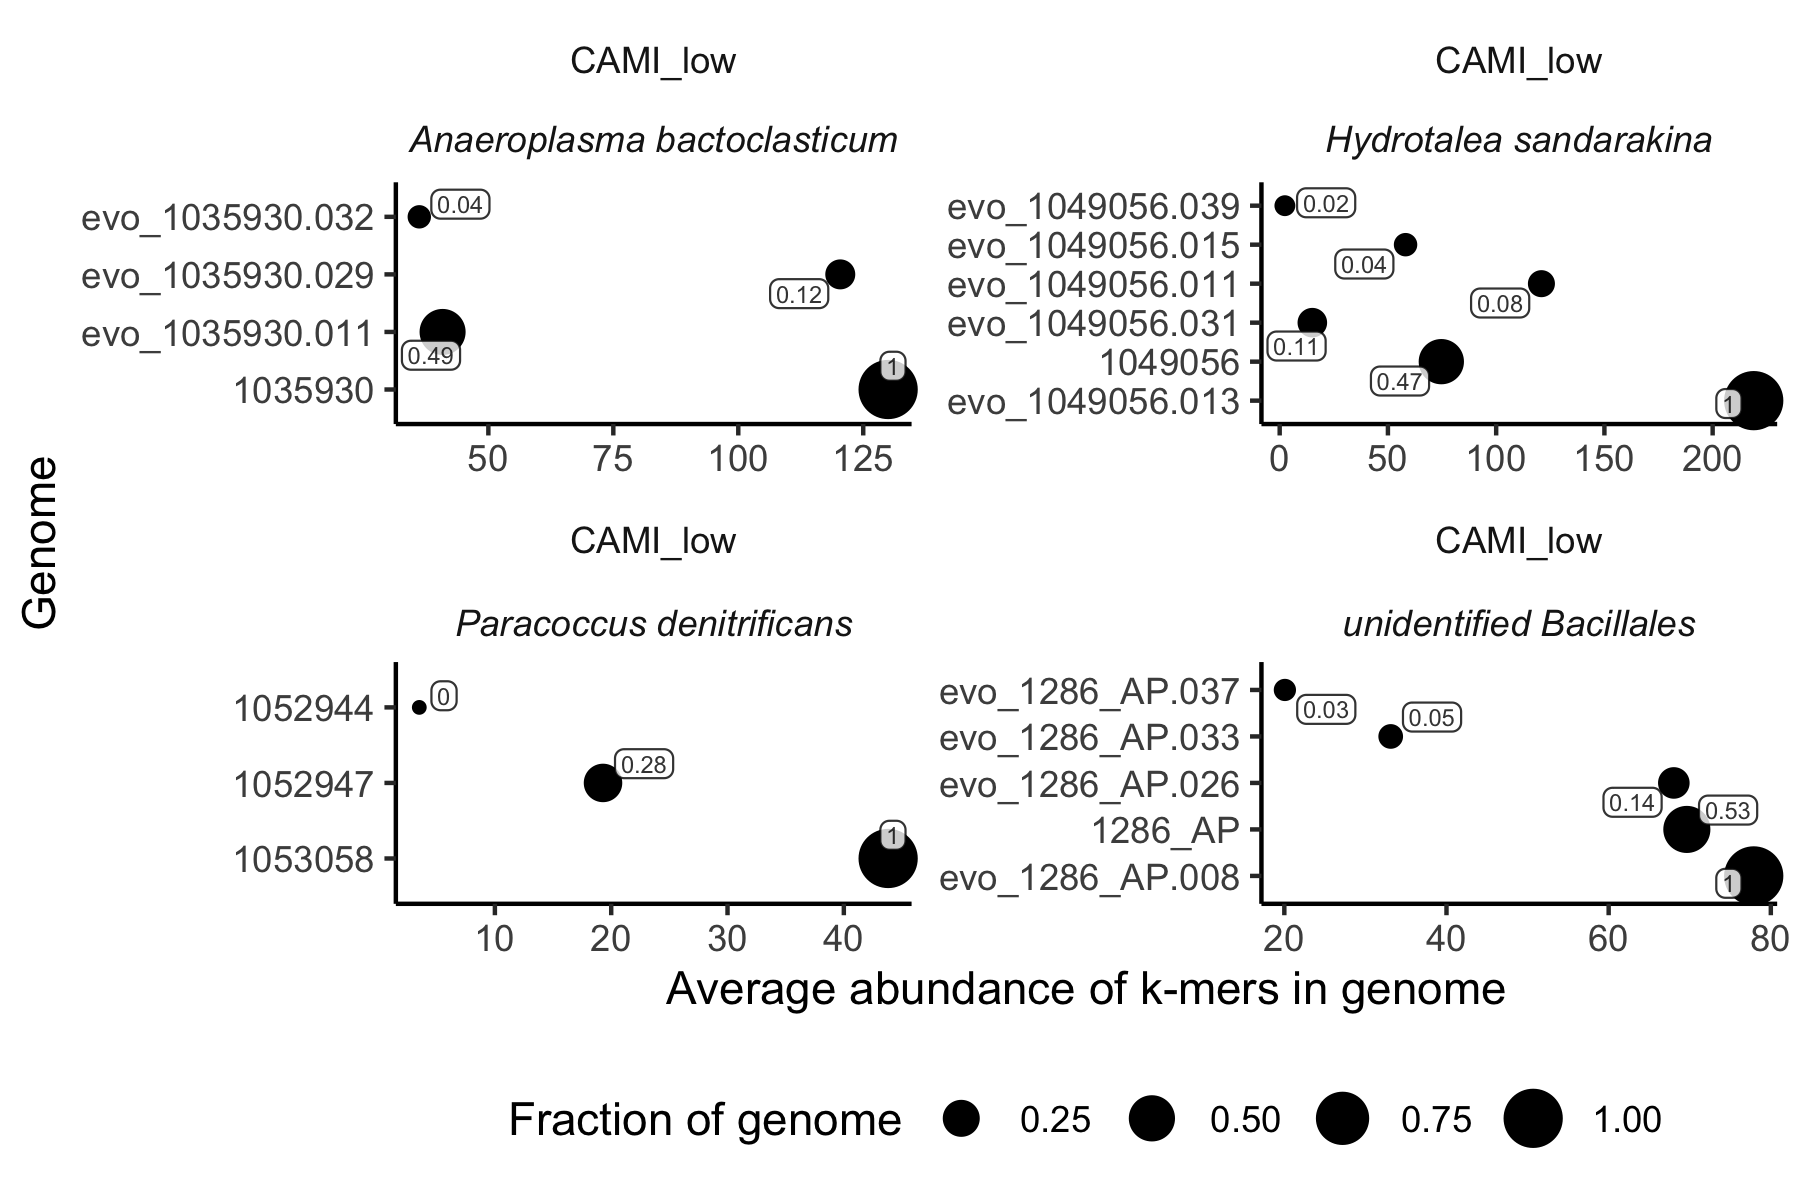

In [8]:
CAMI_multi_strain$plt +
 theme(legend.position = "bottom") +
 labs(x = "Genome", y = "Average abundance of k-mers in genome", size = "Fraction of genome")

In [9]:
# use the returned plot data to customize the plot for the pub
# fix the italics on the labels
tmp <- CAMI_multi_strain$plt_data %>%
        mutate(species = ifelse(genus == "unidentified", paste0("Unidentified~italic('Bacillales')"), species))

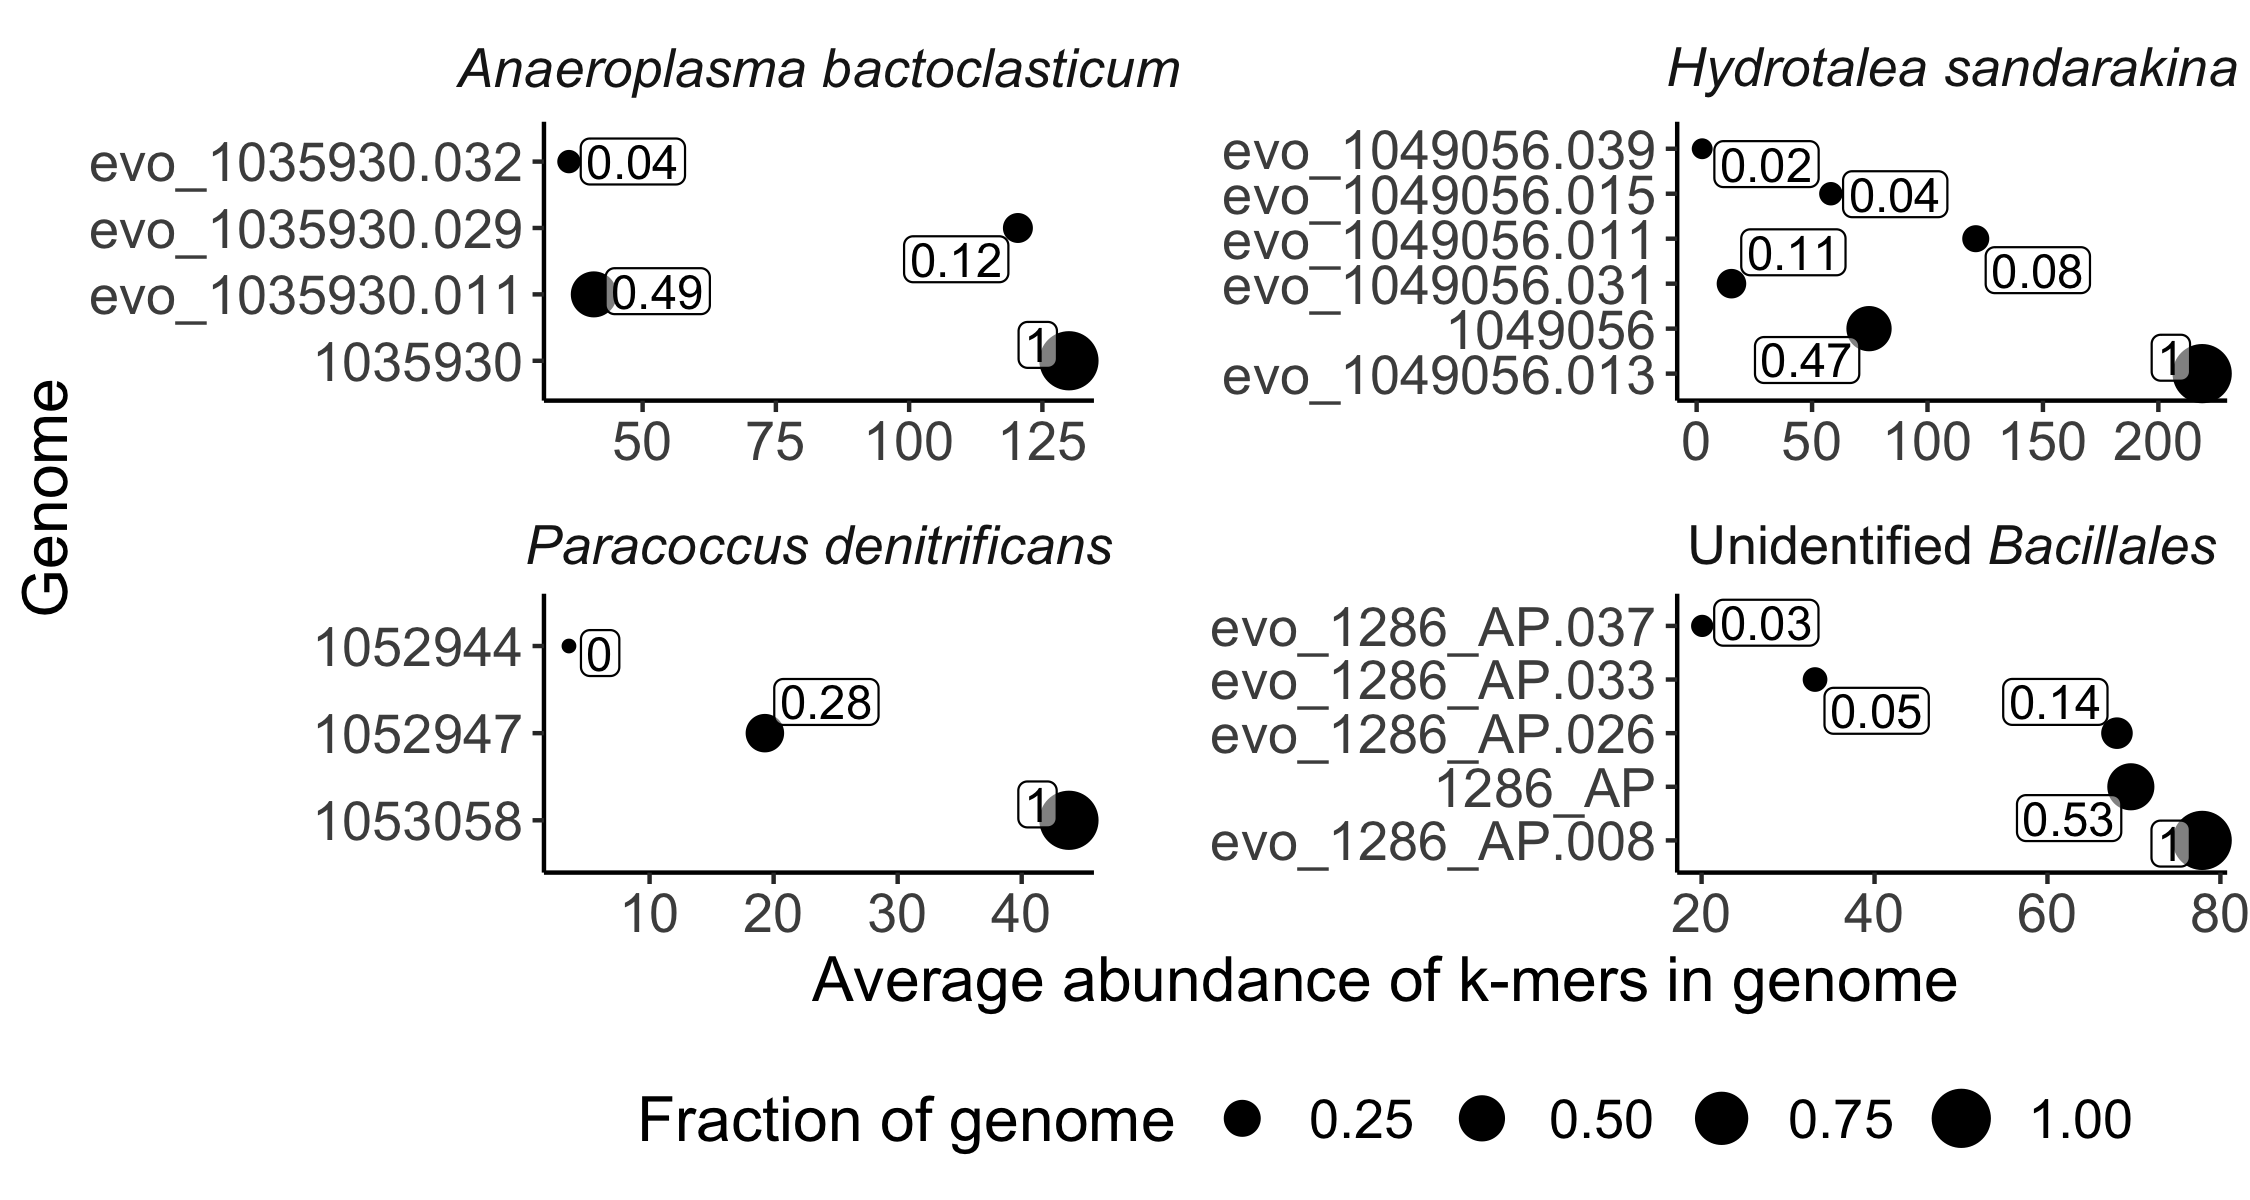

In [13]:
options(repr.plot.width = 7.5, repr.plot.height = 4, repr.plot.res = 300)
set.seed = 1
plt <- ggplot(tmp,
       aes(x = reorder(genome_accession, -f_match),
           y = average_abund,
           label = round(f_match, digits = 2))) +
    geom_point(ggplot2::aes(size = f_match)) +
    coord_flip(clip = "off") +
    facet_wrap(~species, scales = "free", labeller = label_parsed) +
    geom_label_repel(size = 4, color = "black", force = 3, box.padding = 0.1, label.padding = 0.1, fill = alpha(c("white"),0.5)) +
    theme_classic() +
    theme(strip.background = ggplot2::element_blank(),
          legend.position = "bottom",
          axis.text = element_text(size = 13),
          axis.title = element_text(size = 15),
          legend.text = element_text(size = 13), 
          legend.title = element_text(size = 15),
          strip.text = element_text(size = 13),
          panel.spacing.x = unit(2, "lines")) +
    labs(y = "Average abundance of k-mers in genome",
         x = "Genome",
         size = "Fraction of genome")

plt

In [14]:
pdf("figures/fig11_cami.pdf", width = 7.5, height = 4)
plt
dev.off()
png("figures/fig11_cami.png", width = 7.5, height = 4, units = "in", res = 300)
plt
dev.off()
svg("figures/fig11_cami.svg", width = 7.5, height = 4)
plt
dev.off()

pdf 
  2

pdf 
  2

pdf 
  2